<a href="https://colab.research.google.com/github/YusufAbdurrahmann/data-preprocessing-2/blob/main/data_preprocessing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# **Data Importing**

In [ ]:
df = pd.read_csv("titanic_data.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# **Data Understanding**

In [ ]:
df.shape

(889, 15)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,176
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.duplicated().sum()

np.int64(107)

In [120]:
df.describe()

,Survived,Class,Age,Sibsp,Parch,Fare
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,0.420118,2.220414,29.821627,0.535503,0.454142,35.859134
std,0.493943,0.846919,14.729019,0.946062,0.870571,54.070975
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,16.100000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,35.500000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [118]:
df.describe(include = ["object"])

,Sex,Embarked,Class,Who,Deck,Embark_town,Alive
count,676,676,676,676,676,676,676
unique,2,3,3,3,7,3,2
top,Male,S,Third,man,C,Southampton,N
freq,420,520,333,380,544,520,392


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB


# **Data Cleaning**

**Handling Missing Values**

1. Using delete data

In [ ]:
df = df.dropna(subset = "age")

2. Using imputation

In [ ]:
for column in df.columns:
  if df[column].dtypes == "object":
        df[column] = df[column].fillna(df[column].mode()[0])
  else:
        df[column] = df[column].fillna(df[column].mode()[0])

**Handling duplicated data**

In [ ]:
df = df.drop_duplicates()

**Rename data**

In [ ]:
df = df.rename({"pclass":"class"}, axis = 1)

In [ ]:
df["alive"] = df["alive"].str.replace("yes","Y")
df["alive"] = df["alive"].str.replace("no","N")

In [ ]:
df["sex"] = df["sex"].str.capitalize()

In [ ]:
df["adult_male"] = df["adult_male"].astype(bool)

In [ ]:
df.columns = df.columns.str.capitalize()

In [154]:
df = df.rename(columns = {"Class":"Pclass"})

In [ ]:
df.head()

,Survived,Class,Sex,Age,Sibsp,Parch,Fare,Embarked,Class,Who,Adult_male,Deck,Embark_town,Alive,Alone
0,0,3,Male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,N,False
1,1,1,Female,38.0,1,0,71.2833,C,First,woman,True,C,Cherbourg,Y,False
2,1,3,Female,26.0,0,0,7.9250,S,Third,woman,True,C,Southampton,Y,True
3,1,1,Female,35.0,1,0,53.1000,S,First,woman,True,C,Southampton,Y,False
4,0,3,Male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,N,True


# **Exploratory Data Analysis (EDA)**

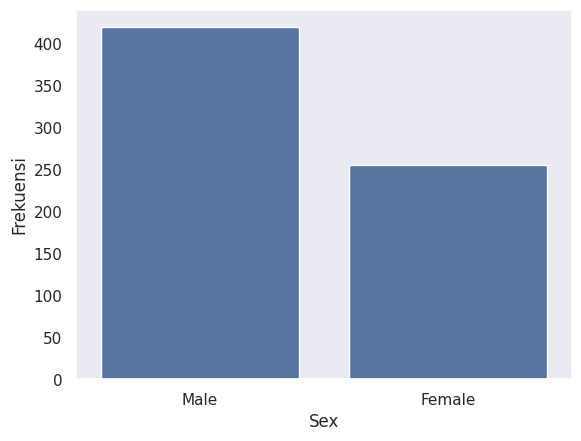

In [115]:
sns.set_theme(style="dark")
sns.countplot(data = df,
              x = "Sex")
plt.ylabel("Frekuensi")
plt.show()

<ipython-input-170-dce00766d057>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df,


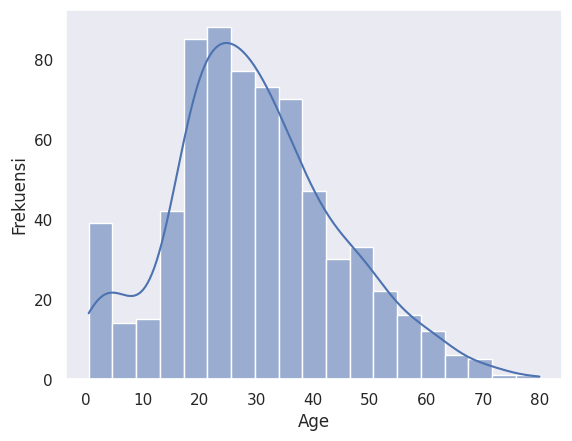

In [170]:
sns.set_theme(style = "dark")
# fig, axes = plt.subplots(2,2,figsize=(15,8))
sns.histplot(data = df,
             x = "Age",
             kde="True",
             palette="pastel")
plt.ylabel("Frekuensi")
plt.show()

In [155]:
df.sample(3)

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked,Pclass,Who,Adult_male,Deck,Embark_town,Alive,Alone
553,1,3,Female,22.0,0,0,7.7750,S,Third,woman,True,C,Southampton,Y,True
361,0,3,Female,45.0,0,1,14.4542,C,Third,woman,True,C,Cherbourg,N,False
394,0,3,Male,22.0,0,0,7.7958,S,Third,man,True,C,Southampton,N,True


<Axes: >

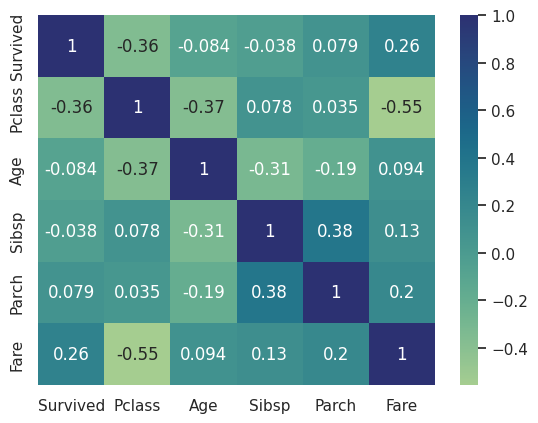

In [172]:
# sns.heatmap(corr, cmap="crest")
sns.heatmap(df.select_dtypes(include = "number").corr(), cmap = "crest", annot = True)